In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

def get_matrix_B(K,n):
    """
    K - number of bits
    n - number of assets
    """
    b = np.array([2**k for k in range(K)])
    return np.kron(np.eye(n),b)

def get_matrix_Q_w(n, p_ri, p_i, Cov_M):
    """
    n - number of assets
    p_ri - penalty for risk violation
    p_i - penalty for initial cost
    Cov_M - covariance matrix of returns of assets of size (n,n)
    """
    Q_w = np.zeros((n,n))

    Q_w += p_ri*Cov_M
    Q_w += p_i*np.ones((n,n))
    
    return Q_w

def get_matrix_Q_x(K, n, p_re, p_i, I, r_fin):
    """
    K - number of bits
    n - number of assets
    p_re - penalty for resulted return > 0 
    p_i - penalty for initial cost > 0
    I - initial money
    r_fin - final return vector
    """
    Q_x = np.zeros((K*n,K*n))
    b = np.array([2**k for k in range(K)])
    b_diag_re = np.diag(np.kron(np.ones(n),b)*np.kron(r_fin,np.ones(K)))
    b_diag_i = np.diag(np.kron(np.ones(n),b))

    Q_x -= p_re*b_diag_re
    Q_x -= p_i*(2*I*b_diag_i)
    
    return Q_x

In [8]:
""" Read data """ 
data_df = pd.read_csv('task-1-stocks.csv')   # column Sj - stock №j, row k - price at period k
data_np = data_df.to_numpy()

""" Construct covariance matrix and finial return vector """ 
return_matrix = (data_np[1:,:] - data_np[:-1,:])/data_np[:-1,:]
return_matrix = return_matrix.T # we want that row is returns of asset j
Cov_M = np.cov(return_matrix, bias=False) # if bias=False (default), then normalization is by (N-1)
r_fin = (data_np[-1,:] - data_np[0,:])/data_np[0,:] # finial return vector


n = data_np.shape[1] # number of assets 
I = 10**6 # initial money
min_price = np.min(data_np[0]) # min price of the stock at day 0
w_max = math.floor(I/min_price) # max possible value of weight
K = math.ceil(np.log2(w_max)) # number of bits for each weight

N = n*K
print('Numer of binary variables: N = n*K = {}'.format(N))

B = get_matrix_B(K,n)
p_re = 10**(-4)
p_ri = 1
p_i = 1
Q_w = get_matrix_Q_w(n, p_ri, p_i, Cov_M)
Q_x = get_matrix_Q_x(K, n, p_re, p_i, I, r_fin)

Q = B.T @ Q_w @ B + Q_x

Numer of binary variables: N = n*K = 3400


In [9]:
Q

array([[-1.99999993e+06,  2.01820903e+00,  4.03641805e+00, ...,
         2.14693770e+09,  4.29387539e+09,  8.58775079e+09],
       [ 2.01820903e+00, -3.99999785e+06,  8.07283610e+00, ...,
         4.29387539e+09,  8.58775079e+09,  1.71755016e+10],
       [ 4.03641805e+00,  8.07283610e+00, -7.99998763e+06, ...,
         8.58775079e+09,  1.71755016e+10,  3.43510031e+10],
       ...,
       [ 2.14693770e+09,  4.29387539e+09,  8.58775079e+09, ...,
         4.60813945e+18,  9.22486883e+18,  1.84497377e+19],
       [ 4.29387539e+09,  8.58775079e+09,  1.71755016e+10, ...,
         9.22486883e+18,  1.84411477e+19,  3.68994753e+19],
       [ 8.58775079e+09,  1.71755016e+10,  3.43510031e+10, ...,
         1.84497377e+19,  3.68994753e+19,  7.37817707e+19]])

In [19]:
Q

array([[-1.99999993e+06,  2.01820903e+00,  4.03641805e+00, ...,
         2.14693770e+09,  4.29387539e+09,  8.58775079e+09],
       [ 2.01820903e+00, -3.99999785e+06,  8.07283610e+00, ...,
         4.29387539e+09,  8.58775079e+09,  1.71755016e+10],
       [ 4.03641805e+00,  8.07283610e+00, -7.99998763e+06, ...,
         8.58775079e+09,  1.71755016e+10,  3.43510031e+10],
       ...,
       [ 2.14693770e+09,  4.29387539e+09,  8.58775079e+09, ...,
         4.60813945e+18,  9.22486883e+18,  1.84497377e+19],
       [ 4.29387539e+09,  8.58775079e+09,  1.71755016e+10, ...,
         9.22486883e+18,  1.84411477e+19,  3.68994753e+19],
       [ 8.58775079e+09,  1.71755016e+10,  3.43510031e+10, ...,
         1.84497377e+19,  3.68994753e+19,  7.37817707e+19]])

In [18]:
np.min(Q)

-997640372224.0

/tmp/ipykernel_26525/3746261168.py:1: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(Q+2*np.min(Q)))


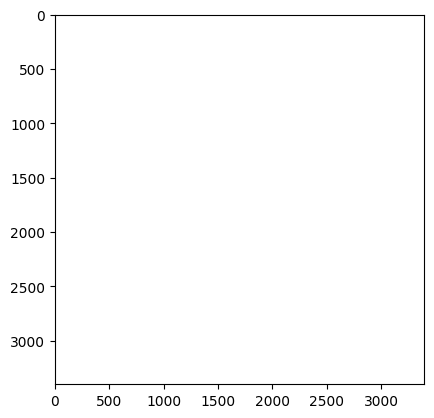

In [21]:
plt.imshow(np.log(abs(Q)+2*np.min(Q)))